In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

In [3]:
data = pd.read_csv("fully_preprocessed_data.csv", index_col=0)

# Arbre de décision

In [9]:
X_train, X_test, y_train, y_test = train_test_split(data["texte"], data["label"], test_size=0.2, random_state=42)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()), 
    ('clf', DecisionTreeClassifier()) 
])

# Définir les paramètres à tester dans la recherche sur grille
param_grid = {
    'clf__criterion': ('gini', 'entropy'),
    'clf__max_depth': (None, 10, 20, 30),
    'clf__min_samples_split': (2, 10, 20),
    'clf__min_samples_leaf': (1, 5, 10),
}

In [10]:
grid_search = GridSearchCV(pipeline, param_grid, cv=cv, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('clf', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'clf__criterion': ('gini', 'entropy'),
                         'clf__max_depth': (None, 10, 20, 30),
                         'clf__min_samples_leaf': (1, 5, 10),
                         'clf__min_samples_split': (2, 10, 20)})

In [13]:
print("Meilleurs paramètres trouvés:")
print(grid_search.best_params_)

print("Score moyen des meilleurs paramètres:")
print(np.round(grid_search.best_score_, 4))

Meilleurs paramètres trouvés:
{'clf__criterion': 'gini', 'clf__max_depth': 30, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 10}
Score moyen des meilleurs paramètres:
0.7626


In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
import pickle

Accuracy sur le test : 0.772


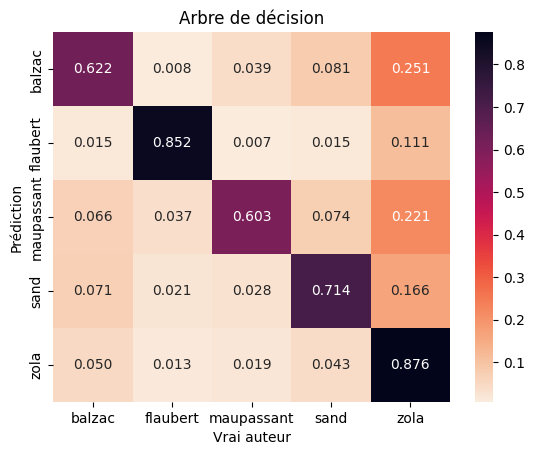

In [52]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()), 
    ('clf', DecisionTreeClassifier(
        criterion='gini',
        max_depth=30,
        min_samples_leaf=1,
        min_samples_split=10
    )) 
])

# Entraînement du modèle avec l'ensemble d'entraînement
pipeline.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = pipeline.predict(X_test)

# Calcul de l'accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calcul de la matrice de confusion normalisée
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

print(f"Accuracy sur le test : {accuracy:.3f}")
heatmap = sns.heatmap(conf_matrix_normalized, cmap=sns.color_palette("rocket_r", as_cmap=True), annot=True, fmt='.3f')

auteurs = ["balzac", "flaubert", "maupassant", "sand", "zola"]
# Modifiez les noms des "ticks" en abscisse et en ordonnée
heatmap.set_xticklabels(auteurs)
heatmap.set_yticklabels(auteurs)

# Modifiez les labels des axes x et y
heatmap.set_xlabel("Vrai auteur")
heatmap.set_ylabel("Prédiction")
plt.title("Arbre de décision")
plt.show()

with open(f"model/dt_model.pkl", "wb") as f:
        pickle.dump(pipeline, f)  

# MultinomialNB

In [15]:
from sklearn.naive_bayes import MultinomialNB

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()), 
    ('clf', MultinomialNB()) 
])

param_grid = {
    'clf__alpha': (0.01, 0.1, 0.5, 1.0, 10.0),
    'clf__fit_prior': (True, False),
}

grid_search = GridSearchCV(pipeline, param_grid, cv=cv, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Meilleurs paramètres trouvés:")
print(grid_search.best_params_)

print("Score moyen des meilleurs paramètres:")
print(np.round(grid_search.best_score_, 4))

Meilleurs paramètres trouvés:
{'clf__alpha': 0.01, 'clf__fit_prior': False}
Score moyen des meilleurs paramètres:
0.9869


Accuracy sur le test : 0.989


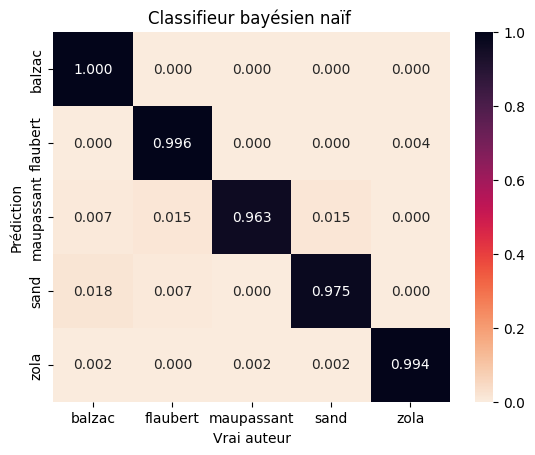

In [51]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()), 
    ('clf', MultinomialNB(
        alpha=0.01,
        fit_prior = False
    )) 
])

# Entraînement du modèle avec l'ensemble d'entraînement
pipeline.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = pipeline.predict(X_test)

# Calcul de l'accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calcul de la matrice de confusion normalisée
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

print(f"Accuracy sur le test : {accuracy:.3f}")
heatmap = sns.heatmap(conf_matrix_normalized, cmap=sns.color_palette("rocket_r", as_cmap=True), annot=True, fmt='.3f')

auteurs = ["balzac", "flaubert", "maupassant", "sand", "zola"]
# Modifiez les noms des "ticks" en abscisse et en ordonnée
heatmap.set_xticklabels(auteurs)
heatmap.set_yticklabels(auteurs)

# Modifiez les labels des axes x et y
heatmap.set_xlabel("Vrai auteur")
heatmap.set_ylabel("Prédiction")
plt.title("Classifieur bayésien naïf ")
plt.show()

with open(f"model/mnb_model.pkl", "wb") as f:
        pickle.dump(pipeline, f) 

# LinearSVC

In [16]:
from sklearn.svm import LinearSVC

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()), 
    ('clf', LinearSVC()) 
])

param_grid = {
    'clf__C': (0.01, 0.1, 1, 10, 100),
    'clf__loss': ('hinge', 'squared_hinge'),
    'clf__class_weight': (None, 'balanced'),
}

grid_search = GridSearchCV(pipeline, param_grid, cv=cv, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Meilleurs paramètres trouvés:")
print(grid_search.best_params_)

print("Score moyen des meilleurs paramètres:")
print(np.round(grid_search.best_score_, 4))

Meilleurs paramètres trouvés:
{'clf__C': 1, 'clf__class_weight': 'balanced', 'clf__loss': 'hinge'}
Score moyen des meilleurs paramètres:
0.9955


Accuracy sur le test : 0.996


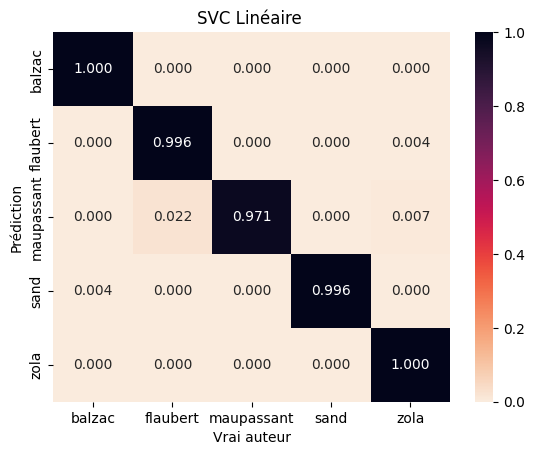

In [50]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()), 
    ('clf', LinearSVC(
        C=1,
        class_weight='balanced',
        loss='hinge'
    )) 
])

# Entraînement du modèle avec l'ensemble d'entraînement
pipeline.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = pipeline.predict(X_test)

# Calcul de l'accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calcul de la matrice de confusion normalisée
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

print(f"Accuracy sur le test : {accuracy:.3f}")
heatmap = sns.heatmap(conf_matrix_normalized, cmap=sns.color_palette("rocket_r", as_cmap=True), annot=True, fmt='.3f')

auteurs = ["balzac", "flaubert", "maupassant", "sand", "zola"]
# Modifiez les noms des "ticks" en abscisse et en ordonnée
heatmap.set_xticklabels(auteurs)
heatmap.set_yticklabels(auteurs)

# Modifiez les labels des axes x et y
heatmap.set_xlabel("Vrai auteur")
heatmap.set_ylabel("Prédiction")
plt.title("SVC Linéaire ")
plt.show()

with open(f"model/lsvc_model.pkl", "wb") as f:
        pickle.dump(pipeline, f) 

# Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()), 
    ('clf', RandomForestClassifier()) 
])

param_grid = {
    'clf__n_estimators': (10, 50, 100, 200),
    'clf__criterion': ('gini', 'entropy'),
    'clf__max_depth': (None, 10, 20, 30),
    'clf__min_samples_split': (2, 10, 20),
    'clf__min_samples_leaf': (1, 5, 10),
    'clf__class_weight': (None, 'balanced', 'balanced_subsample'),
}

grid_search = GridSearchCV(pipeline, param_grid, cv=cv, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Meilleurs paramètres trouvés:")
print(grid_search.best_params_)

print("Score moyen des meilleurs paramètres:")
print(np.round(grid_search.best_score_, 4))

Meilleurs paramètres trouvés:
{'clf__class_weight': 'balanced', 'clf__criterion': 'gini', 'clf__max_depth': None, 'clf__min_samples_leaf': 5, 'clf__min_samples_split': 10, 'clf__n_estimators': 200}
Score moyen des meilleurs paramètres:
0.9498


Accuracy sur le test : 0.948


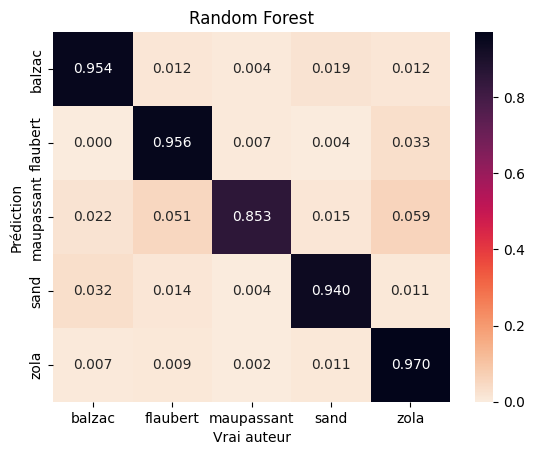

In [53]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()), 
    ('clf', RandomForestClassifier(
        class_weight='balanced',
        criterion='gini',
        max_depth=None,
        min_samples_leaf=5,
        min_samples_split=10,
        n_estimators=200
    )) 
])

# Entraînement du modèle avec l'ensemble d'entraînement
pipeline.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = pipeline.predict(X_test)

# Calcul de l'accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calcul de la matrice de confusion normalisée
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

print(f"Accuracy sur le test : {accuracy:.3f}")
heatmap = sns.heatmap(conf_matrix_normalized, cmap=sns.color_palette("rocket_r", as_cmap=True), annot=True, fmt='.3f')

auteurs = ["balzac", "flaubert", "maupassant", "sand", "zola"]
# Modifiez les noms des "ticks" en abscisse et en ordonnée
heatmap.set_xticklabels(auteurs)
heatmap.set_yticklabels(auteurs)

# Modifiez les labels des axes x et y
heatmap.set_xlabel("Vrai auteur")
heatmap.set_ylabel("Prédiction")
plt.title("Random Forest")
plt.show()

with open(f"model/rf_model.pkl", "wb") as f:
        pickle.dump(pipeline, f) 

# AdaBoost

In [19]:
from sklearn.ensemble import AdaBoostClassifier

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()), 
    ('clf', AdaBoostClassifier()) 
])

param_grid = {
    'clf__n_estimators': (10, 50, 100, 200),
    'clf__learning_rate': (0.01, 0.1, 1, 10),
    'clf__algorithm': ('SAMME', 'SAMME.R'),
}

grid_search = GridSearchCV(pipeline, param_grid, cv=cv, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Meilleurs paramètres trouvés:")
print(grid_search.best_params_)

print("Score moyen des meilleurs paramètres:")
print(np.round(grid_search.best_score_, 4))

Meilleurs paramètres trouvés:
{'clf__algorithm': 'SAMME.R', 'clf__learning_rate': 0.1, 'clf__n_estimators': 200}
Score moyen des meilleurs paramètres:
0.8486


Accuracy sur le test : 0.840


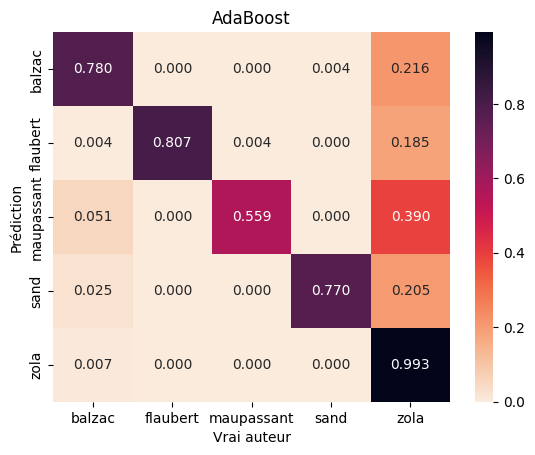

In [54]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()), 
    ('clf', AdaBoostClassifier(
        algorithm='SAMME.R',
        learning_rate=0.1,
        n_estimators=200
    )) 
])

# Entraînement du modèle avec l'ensemble d'entraînement
pipeline.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = pipeline.predict(X_test)

# Calcul de l'accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calcul de la matrice de confusion normalisée
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

print(f"Accuracy sur le test : {accuracy:.3f}")
heatmap = sns.heatmap(conf_matrix_normalized, cmap=sns.color_palette("rocket_r", as_cmap=True), annot=True, fmt='.3f')

auteurs = ["balzac", "flaubert", "maupassant", "sand", "zola"]
# Modifiez les noms des "ticks" en abscisse et en ordonnée
heatmap.set_xticklabels(auteurs)
heatmap.set_yticklabels(auteurs)

# Modifiez les labels des axes x et y
heatmap.set_xlabel("Vrai auteur")
heatmap.set_ylabel("Prédiction")
plt.title("AdaBoost")
plt.show()

with open(f"model/ada_model.pkl", "wb") as f:
        pickle.dump(pipeline, f) 

# Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, make_scorer

# Création de la fonction de scoring personnalisée pour gérer les erreurs
def safe_accuracy(y_true, y_pred):
    try:
        return accuracy_score(y_true, y_pred)
    except ValueError:
        return 0

safe_accuracy_scorer = make_scorer(safe_accuracy, greater_is_better=True)

X_train, X_test, y_train, y_test = train_test_split(data["texte"], data["label"], test_size=0.2, random_state=42)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()), 
    ('clf', LogisticRegression()) 
])

param_grid = {
    'clf__C': (0.01, 0.1, 1, 10, 100),
    'clf__penalty': ('l1', 'l2', 'elasticnet', 'none'),
    'clf__solver': ('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'),
    'clf__class_weight': (None, 'balanced'),
}

# Utiliser le safe_accuracy_scorer pour gérer les erreurs
grid_search = GridSearchCV(pipeline, param_grid, cv=cv, n_jobs=-1, scoring=safe_accuracy_scorer)
grid_search.fit(X_train, y_train)

print("Meilleurs paramètres trouvés:")
print(grid_search.best_params_)

print("Score moyen des meilleurs paramètres:")
print(np.round(grid_search.best_score_, 4))

C:\Users\Quentin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
450 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Quentin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Quentin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-

Meilleurs paramètres trouvés:
{'clf__C': 1, 'clf__class_weight': 'balanced', 'clf__penalty': 'none', 'clf__solver': 'saga'}
Score moyen des meilleurs paramètres:
0.9946


C:\Users\Quentin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


C:\Users\Quentin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy sur le test : 0.999


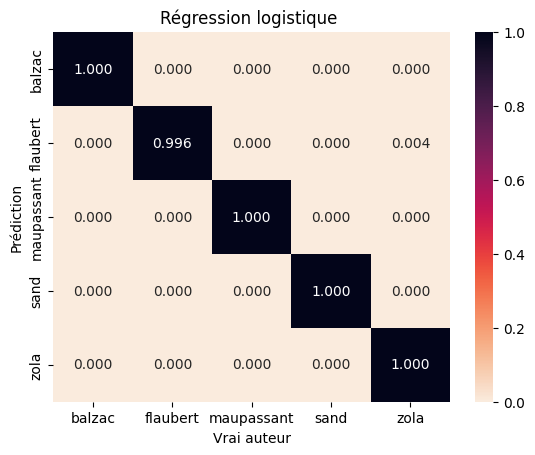

In [55]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()), 
    ('clf', LogisticRegression(
        C=1,
        class_weight='balanced',
        penalty=None,
        solver='saga'
    )) 
])

# Entraînement du modèle avec l'ensemble d'entraînement
pipeline.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = pipeline.predict(X_test)

# Calcul de l'accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calcul de la matrice de confusion normalisée
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

print(f"Accuracy sur le test : {accuracy:.3f}")
heatmap = sns.heatmap(conf_matrix_normalized, cmap=sns.color_palette("rocket_r", as_cmap=True), annot=True, fmt='.3f')

auteurs = ["balzac", "flaubert", "maupassant", "sand", "zola"]
# Modifiez les noms des "ticks" en abscisse et en ordonnée
heatmap.set_xticklabels(auteurs)
heatmap.set_yticklabels(auteurs)

# Modifiez les labels des axes x et y
heatmap.set_xlabel("Vrai auteur")
heatmap.set_ylabel("Prédiction")
plt.title("Régression logistique ")
plt.show()

with open(f"model/lr_model.pkl", "wb") as f:
        pickle.dump(pipeline, f) 